**Downloading datasets from https://fred.stlouisfed.org/ and using them as exogenous variables (External Signals) for Walmart Sales Forcasting using SARIMAX**

**This notebook contains analysis and convertion of data into stationary of Weekly dataset**

In [65]:
import pandas as pd
import numpy as np

#### Dataset: https://fred.stlouisfed.org/series/CCSA  (Continued Claims (Insured Unemployment) (CCSA))

#### **Categories > Population, Employment, & Labor Markets > Weekly Initial Claims**

**Source: U.S. Employment and Training Administration**

**Release: Unemployment Insurance Weekly Claims Report**

**Units:  Number, Seasonally Adjusted**

**Frequency:  Weekly, Ending Saturday**

**Continued claims, also referred to as insured unemployment, is the number of people who have already filed an initial claim and who have experienced a week of unemployment and then filed a continued claim to claim benefits for that week of unemployment. Continued claims data are based on the week of unemployment, not the week when the initial claim was filed.**

##### **Start Date: 2010-02-05; End Date: 2012-11-01**

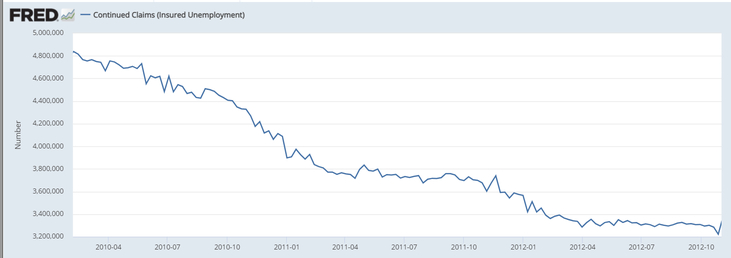

In [2]:
from IPython.display import Image
Image(filename=r'C:\Users\karth\Desktop\ML_Task\ccsa.jpg')

In [3]:
ccsa_data = pd.read_csv(r"C:\Users\karth\Desktop\Timeseries_Task\CCSA.csv")
ccsa_data.head().append(ccsa_data.tail())

,DATE,CCSA
0,2010-02-06,4838000
1,2010-02-13,4815000
2,2010-02-20,4767000
3,2010-02-27,4755000
4,2010-03-06,4766000
138,2012-09-29,3309000
139,2012-10-06,3295000
140,2012-10-13,3302000
141,2012-10-20,3285000
142,2012-10-27,3223000


In [4]:
ccsa_data.shape

(143, 2)

**By visually we can clearly see that there is no missing information**

#### Dataset: https://fred.stlouisfed.org/series/ICSA  (Initial Claims (ICSA))

#### **Categories > Population, Employment, & Labor Markets > Weekly Initial Claims**

**Source: U.S. Employment and Training Administration**

**Release: Unemployment Insurance Weekly Claims Report**

**Units:  Number, Seasonally Adjusted**

**Frequency:  Weekly, Ending Saturday**

**An initial claim is a claim filed by an unemployed individual after a separation from an employer. The claim requests a determination of basic eligibility for the Unemployment Insurance program.**

##### **Start Date: 2010-02-05; End Date: 2012-11-01**

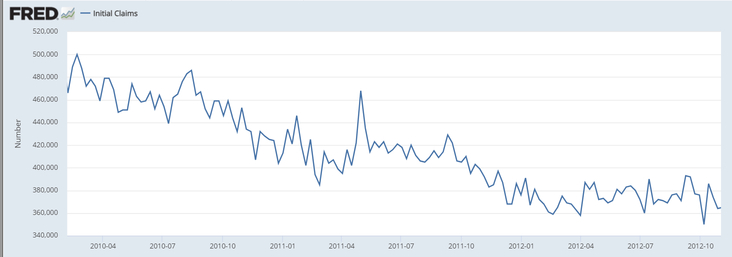

In [5]:
Image(filename=r'C:\Users\karth\Desktop\ML_Task\icsa.jpg')

In [6]:
icsa_data = pd.read_csv(r"C:\Users\karth\Desktop\Timeseries_Task\ICSA.csv")
icsa_data.head().append(icsa_data.tail())

,DATE,ICSA
0,2010-02-06,466000
1,2010-02-13,489000
2,2010-02-20,500000
3,2010-02-27,488000
4,2010-03-06,472000
138,2012-09-29,376000
139,2012-10-06,350000
140,2012-10-13,386000
141,2012-10-20,374000
142,2012-10-27,364000


In [7]:
icsa_data.shape

(143, 2)

**By visually we can clearly see that there is no missing information**

In [14]:
ccsa_data.isnull().sum()

DATE    0
CCSA    0
dtype: int64

In [15]:
icsa_data.isnull().sum()

DATE    0
ICSA    0
dtype: int64

In [16]:
# Checking percentage of null values for each feature/column

null_values_per_variable = 100 * (ccsa_data.isnull().sum()/ccsa_data.shape[0]).round(3)#.reset_index()
null_values_per_variable.sort_values(ascending = False)

CCSA    0.0
DATE    0.0
dtype: float64

In [17]:
null_values_per_variable = 100 * (icsa_data.isnull().sum()/icsa_data.shape[0]).round(3)#.reset_index()
null_values_per_variable.sort_values(ascending = False)

ICSA    0.0
DATE    0.0
dtype: float64

In [18]:
ccsa_data['CCSA'].value_counts()

4755000    2
3772000    2
3316000    2
3312000    2
3302000    2
          ..
4137000    1
4426000    1
4606000    1
4707000    1
3392000    1
Name: CCSA, Length: 132, dtype: int64

In [19]:
icsa_data['ICSA'].value_counts()

459000    5
368000    5
372000    4
381000    3
387000    3
         ..
397000    1
476000    1
390000    1
375000    1
453000    1
Name: ICSA, Length: 87, dtype: int64

In [20]:
icsa_data['ICSA'].unique()

array([466000, 489000, 500000, 488000, 472000, 478000, 459000, 479000,
       469000, 449000, 451000, 474000, 463000, 458000, 467000, 452000,
       464000, 454000, 439000, 462000, 465000, 476000, 483000, 486000,
       444000, 446000, 432000, 453000, 434000, 407000, 428000, 425000,
       424000, 404000, 413000, 421000, 420000, 402000, 394000, 385000,
       414000, 399000, 395000, 416000, 422000, 468000, 435000, 423000,
       418000, 408000, 411000, 406000, 405000, 409000, 415000, 429000,
       410000, 403000, 392000, 383000, 397000, 387000, 368000, 386000,
       376000, 391000, 367000, 381000, 372000, 361000, 359000, 365000,
       375000, 369000, 363000, 358000, 373000, 371000, 377000, 384000,
       380000, 360000, 390000, 393000, 350000, 374000, 364000],
      dtype=int64)

In [21]:
ccsa_data['CCSA'].unique()

array([4838000, 4815000, 4767000, 4755000, 4766000, 4750000, 4743000,
       4668000, 4746000, 4721000, 4690000, 4695000, 4707000, 4688000,
       4731000, 4553000, 4624000, 4606000, 4619000, 4484000, 4620000,
       4482000, 4545000, 4529000, 4467000, 4478000, 4432000, 4426000,
       4509000, 4501000, 4487000, 4452000, 4431000, 4407000, 4403000,
       4348000, 4331000, 4328000, 4270000, 4176000, 4218000, 4118000,
       4137000, 4062000, 4113000, 4088000, 3898000, 3907000, 3974000,
       3926000, 3887000, 3928000, 3839000, 3821000, 3809000, 3772000,
       3752000, 3766000, 3756000, 3751000, 3717000, 3796000, 3834000,
       3787000, 3781000, 3799000, 3728000, 3750000, 3746000, 3719000,
       3733000, 3724000, 3734000, 3741000, 3676000, 3709000, 3715000,
       3723000, 3759000, 3758000, 3747000, 3707000, 3697000, 3731000,
       3704000, 3699000, 3677000, 3603000, 3739000, 3592000, 3595000,
       3543000, 3588000, 3575000, 3566000, 3421000, 3511000, 3419000,
       3454000, 3391

#### By above code cells we can make conformation that there are no missing values and dates

C:\Users\karth\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'CCSA')

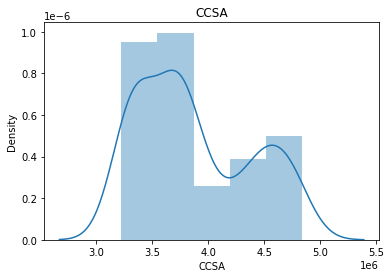

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.distplot(ccsa_data['CCSA'])
plt.title('CCSA')

C:\Users\karth\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'ICSA')

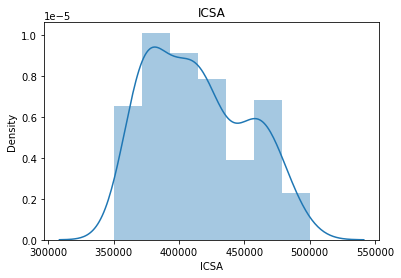

In [35]:
sns.distplot(icsa_data['ICSA'])
plt.title('ICSA')

Text(0.5, 1.0, 'CCSA')

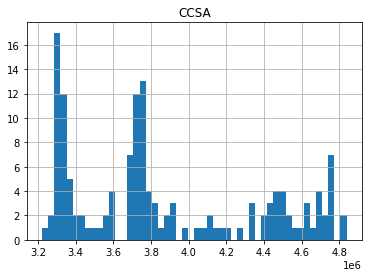

In [36]:
figure=ccsa_data.CCSA.hist(bins=50)
figure.set_title('CCSA')

In [37]:
data.head()

,DATE,CCSA,ICSA
0,2010-02-06,4838000,466000
1,2010-02-13,4815000,489000
2,2010-02-20,4767000,500000
3,2010-02-27,4755000,488000
4,2010-03-06,4766000,472000


In [38]:
data.shape

(143, 3)

**Converting DATE variable into datetime64[ns] datatype**

In [39]:
data.DATE = data.DATE.astype("datetime64[ns]")

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143 entries, 0 to 142
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    143 non-null    datetime64[ns]
 1   CCSA    143 non-null    int64         
 2   ICSA    143 non-null    int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 4.5 KB


#### Converting object datatype variables into float datatype

In [41]:
data['CCSA'] = data['CCSA'].astype(str).astype(float)
data['ICSA'] = data['ICSA'].astype(str).astype(float)

In [42]:
data = pd.DataFrame(data)

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143 entries, 0 to 142
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    143 non-null    datetime64[ns]
 1   CCSA    143 non-null    float64       
 2   ICSA    143 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 4.5 KB


In [44]:
data.shape

(143, 3)

In [46]:
data.head().append(data.tail())

,DATE,CCSA,ICSA
0,2010-02-06,4838000.0,466000.0
1,2010-02-13,4815000.0,489000.0
2,2010-02-20,4767000.0,500000.0
3,2010-02-27,4755000.0,488000.0
4,2010-03-06,4766000.0,472000.0
138,2012-09-29,3309000.0,376000.0
139,2012-10-06,3295000.0,350000.0
140,2012-10-13,3302000.0,386000.0
141,2012-10-20,3285000.0,374000.0
142,2012-10-27,3223000.0,364000.0


### Resampling data into Weekly data

In [47]:
data = data.set_index("DATE").resample('W').mean()

data.head().append(data.tail())

,CCSA,ICSA
DATE,,
2010-02-07,4838000.0,466000.0
2010-02-14,4815000.0,489000.0
2010-02-21,4767000.0,500000.0
2010-02-28,4755000.0,488000.0
2010-03-07,4766000.0,472000.0
2012-09-30,3309000.0,376000.0
2012-10-07,3295000.0,350000.0
2012-10-14,3302000.0,386000.0
2012-10-21,3285000.0,374000.0


In [48]:
data.shape

(143, 2)

#### Plotting and observing each variable visually to see any trend, seasonality

<AxesSubplot:>

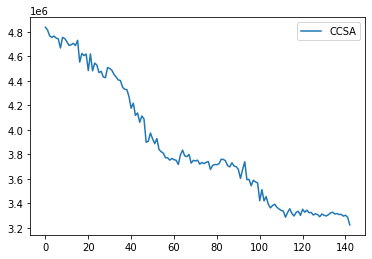

In [49]:
data = data.reset_index() # to get the indexes back to 0, 1, 2,etc.
data1 = data[['CCSA']]
data1.plot()

<AxesSubplot:>

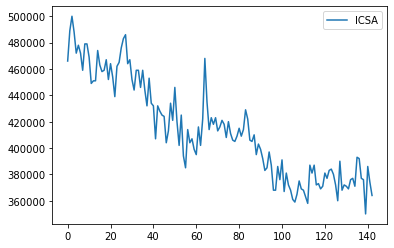

In [50]:
data2 = data[['ICSA']]
data2.plot()

**Clearly by visually we can see that there is downward trend present in these variables, so let's perform first order differentiation to eliminate these components**

<AxesSubplot:>

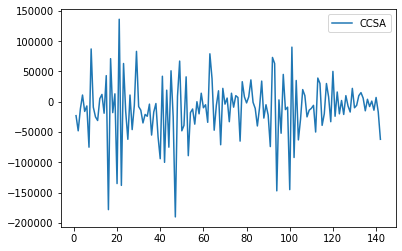

In [51]:
# This is for reducing trend and seasonality

CCSA_first_diff = data1 - data1.shift(1) # Shifting by 1 i.e., t-1

#CCSA_first_diff = CCSA_first_diff.dropna(inplace = False) # Dropping NaN values in our data

CCSA_first_diff.plot()

<AxesSubplot:>

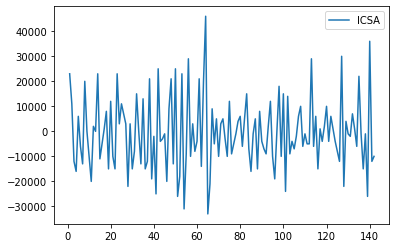

In [52]:
# This is for reducing trend and seasonality

ICSA_first_diff = data2 - data2.shift(1) # Shifting by 1 i.e., t-1

#ICSA_first_diff = ICSA_first_diff.dropna(inplace = False) # Dropping NaN values in our data

ICSA_first_diff.plot()

#### Creating new variables in dataframe of newly created features

In [53]:
data['CCSA_first_diff'] = CCSA_first_diff
data['ICSA_first_diff'] = ICSA_first_diff

In [54]:
data.head()

,DATE,CCSA,ICSA,CCSA_first_diff,ICSA_first_diff
0,2010-02-07,4838000.0,466000.0,NaN,NaN
1,2010-02-14,4815000.0,489000.0,-23000.0,23000.0
2,2010-02-21,4767000.0,500000.0,-48000.0,11000.0
3,2010-02-28,4755000.0,488000.0,-12000.0,-12000.0
4,2010-03-07,4766000.0,472000.0,11000.0,-16000.0


**Dropping existing features**

In [55]:
data = data.drop(columns=['CCSA', 'ICSA'])

In [56]:
data.head()

,DATE,CCSA_first_diff,ICSA_first_diff
0,2010-02-07,NaN,NaN
1,2010-02-14,-23000.0,23000.0
2,2010-02-21,-48000.0,11000.0
3,2010-02-28,-12000.0,-12000.0
4,2010-03-07,11000.0,-16000.0


**Performing backward fill of missing values**

In [57]:
data['CCSA_first_diff'] = data['CCSA_first_diff'].fillna(method='bfill')
data['ICSA_first_diff'] = data['ICSA_first_diff'].fillna(method='bfill')

In [58]:
data.head().append(data.tail())

,DATE,CCSA_first_diff,ICSA_first_diff
0,2010-02-07,-23000.0,23000.0
1,2010-02-14,-23000.0,23000.0
2,2010-02-21,-48000.0,11000.0
3,2010-02-28,-12000.0,-12000.0
4,2010-03-07,11000.0,-16000.0
138,2012-09-30,1000.0,-1000.0
139,2012-10-07,-14000.0,-26000.0
140,2012-10-14,7000.0,36000.0
141,2012-10-21,-17000.0,-12000.0
142,2012-10-28,-62000.0,-10000.0


In [60]:
data.shape

(143, 3)

**Renaming DATE column for my convenience**

In [61]:
data.rename(columns = {'DATE':'Date'}, inplace = True)

In [62]:
#data = data.reset_index() # to get the indexes back to 0, 1, 2,etc.
data.head().append(data.tail())

,Date,CCSA_first_diff,ICSA_first_diff
0,2010-02-07,-23000.0,23000.0
1,2010-02-14,-23000.0,23000.0
2,2010-02-21,-48000.0,11000.0
3,2010-02-28,-12000.0,-12000.0
4,2010-03-07,11000.0,-16000.0
138,2012-09-30,1000.0,-1000.0
139,2012-10-07,-14000.0,-26000.0
140,2012-10-14,7000.0,36000.0
141,2012-10-21,-17000.0,-12000.0
142,2012-10-28,-62000.0,-10000.0


**--->Save**

In [64]:
#data.to_csv('C://Users//karth//Desktop//Timeseries_Task//weekly.csv', encoding='utf-8' ,index=False)

In [83]:
## Checking can we merge weekly_sales data with exogenous variables data
# import pandas as pd
# df1 = pd.read_csv('C://Users//karth//Desktop//Timeseries_Task//data1.csv')
# df = pd.read_csv(r"C://Users//karth//Desktop//Timeseries_Task//exog_withdiff_2.csv")
# # merge
# df = df1.merge(df, on='Date', how='left')
# # Dropping 'Date'
# df = df.drop(columns=['Date'])
# ## Using Boxplots
# fig, axes = plt.subplots(9,1, figsize=(15,25))
# for i, c in enumerate(df):
#     _ = df[[c]].boxplot(ax=axes[i], vert=False)